# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

C:\Users\LENOVO\anaconda3\envs\innovationproject\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\envs\innovationproject\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\envs\innovationproject\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
import splitfolders

input_folder = './PlantVillage/'
output_folder = './output/'

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.1, 0.1))


In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        './output/train/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",

)

Found 1721 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.67725664 0.64980567 0.67725664]
  [0.6778814  0.65043044 0.6778814 ]
  [0.68734753 0.65989655 0.68734753]
  ...
  [0.6783213  0.662635   0.717537  ]
  [0.6802103  0.664524   0.719426  ]
  [0.6820993  0.666413   0.72131497]]

 [[0.67788637 0.6504354  0.67788637]
  [0.6759925  0.64854145 0.6759925 ]
  [0.68671787 0.6592669  0.68671787]
  ...
  [0.6671923  0.651506   0.70640796]
  [0.6634143  0.647728   0.70263   ]
  [0.6596364  0.6439501  0.69885206]]

 [[0.6784314  0.6509804  0.6784314 ]
  [0.6746453  0.6471943  0.6746453 ]
  [0.68571556 0.6582646  0.68571556]
  ...
  [0.67367905 0.6579928  0.71289474]
  [0.677457   0.6617707  0.7166727 ]
  [0.68123496 0.6655487  0.72045064]]

 ...

 [[0.41370717 0.36272678 0.3980209 ]
  [0.41244784 0.36146745 0.39676157]
  [0.41003612 0.35905573 0.39434984]
  ...
  [0.5168204  0.46976155 0.50897723]
  [0.50211364 0.45505485 0.49427053]
  [0.46046865 0.41340983 0.4526255 ]]

 [[0.3943679  0.3433875  0.37868163]
  [0.39058995 0.33960956 0.37490368]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        './output/val/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        './output/test/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.37976673 0.36408043 0.43074712]
  [0.41091868 0.3952324  0.46189907]
  [0.53731287 0.5216266  0.58829325]
  ...
  [0.6254701  0.6293917  0.7078231 ]
  [0.62392634 0.6278479  0.7062793 ]
  [0.62152255 0.6254441  0.7038755 ]]

 [[0.3828542  0.36716792 0.43383458]
  [0.39085    0.37516373 0.4418304 ]
  [0.54618937 0.5305031  0.59716976]
  ...
  [0.5996079  0.6035295  0.6819609 ]
  [0.5969063  0.6008279  0.6792593 ]
  [0.59607846 0.6        0.6784314 ]]

 [[0.3859417  0.37025544 0.4369221 ]
  [0.3707814  0.35509512 0.42176178]
  [0.5550659  0.5393796  0.60604626]
  ...
  [0.59607846 0.6        0.6784314 ]
  [0.59607846 0.6        0.6784314 ]
  [0.59657574 0.6        0.67793417]]

 ...

 [[0.5568302  0.5440831  0.6087849 ]
  [0.5630052  0.55064404 0.61611766]
  [0.56918013 0.55720496 0.62345046]
  ...
  [0.79214925 0.7882277  0.84312963]
  [0.7632047  0.7592831  0.8141851 ]
  [0.7267956  0.72287405 0.777776  ]]

 [[0.59883004 0.5870653  0.653732  ]
  [0.60230345 0.59053874 0.6572054 ]


## Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 73s 1s/step - loss: 0.8957 - accuracy: 0.5164 - val_loss: 0.7952 - val_accuracy: 0.5781
Epoch 2/20
47/47 [==============================] - 35s 744ms/step - loss: 0.5885 - accuracy: 0.7488 - val_loss: 0.3768 - val_accuracy: 0.8594
Epoch 3/20
47/47 [==============================] - 29s 612ms/step - loss: 0.4061 - accuracy: 0.8310 - val_loss: 0.2861 - val_accuracy: 0.8698
Epoch 4/20
47/47 [==============================] - 29s 609ms/step - loss: 0.2909 - accuracy: 0.8790 - val_loss: 0.1633 - val_accuracy: 0.9323
Epoch 5/20
47/47 [==============================] - 30s 628ms/step - loss: 0.2391 - accuracy: 0.9078 - val_loss: 0.1667 - val_accuracy: 0.9479
Epoch 6/20
47/47 [==============================] - 28s 594ms/step - loss: 0.2006 - accuracy: 0.9172 - val_loss: 0.1302 - val_accuracy: 0.9531
Epoch 7/20
47/47 [==============================] - 29s 605ms/step - loss: 0.2021 - accuracy: 0.9259 - val_loss: 0.1421 - val_accuracy: 0.9479
Ep

In [17]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 7s 1s/step - loss: 0.1002 - accuracy: 0.9583


In [18]:
scores

[0.10018818825483322, 0.9583333134651184]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [19]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

20

In [24]:
history.history['loss'][:9] # show loss for first 9 epochs

[0.8956518173217773,
 0.588506281375885,
 0.406127005815506,
 0.29087209701538086,
 0.23911063373088837,
 0.20062077045440674,
 0.20214518904685974,
 0.19818130135536194,
 0.1464356631040573]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.578125,
 0.859375,
 0.8697916865348816,
 0.9322916865348816,
 0.9479166865348816,
 0.953125,
 0.9479166865348816,
 0.953125,
 0.9635416865348816,
 0.953125,
 0.9791666865348816,
 0.9791666865348816,
 0.984375,
 0.9791666865348816,
 0.984375,
 0.9739583134651184,
 0.9635416865348816,
 0.9791666865348816,
 0.9739583134651184,
 0.9739583134651184]

In [27]:
acc

[0.5163660645484924,
 0.7488309741020203,
 0.8309953212738037,
 0.8789893388748169,
 0.9078156352043152,
 0.9171676635742188,
 0.9258517026901245,
 0.9245157241821289,
 0.9418837428092957,
 0.9392117857933044,
 0.9559118151664734,
 0.9519038200378418,
 0.9739478826522827,
 0.9572478532791138,
 0.9739478826522827,
 0.9793882966041565,
 0.9532397985458374,
 0.9679358601570129,
 0.9867021441459656,
 0.9726119041442871]

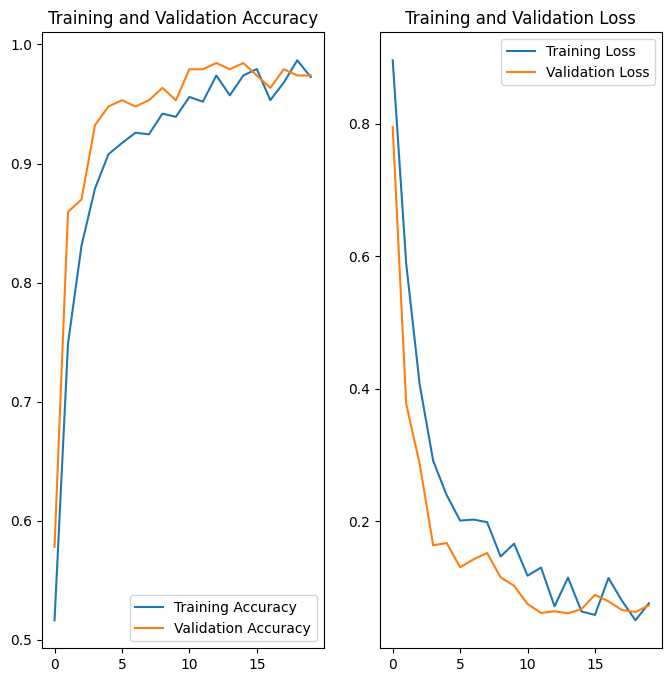

In [28]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


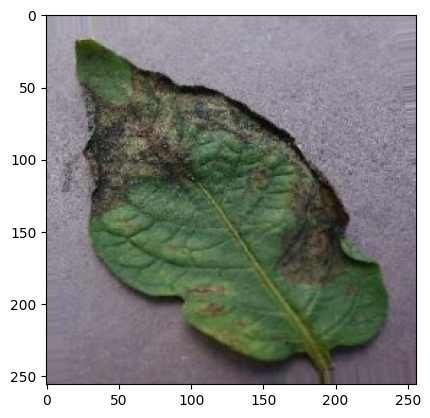

In [29]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

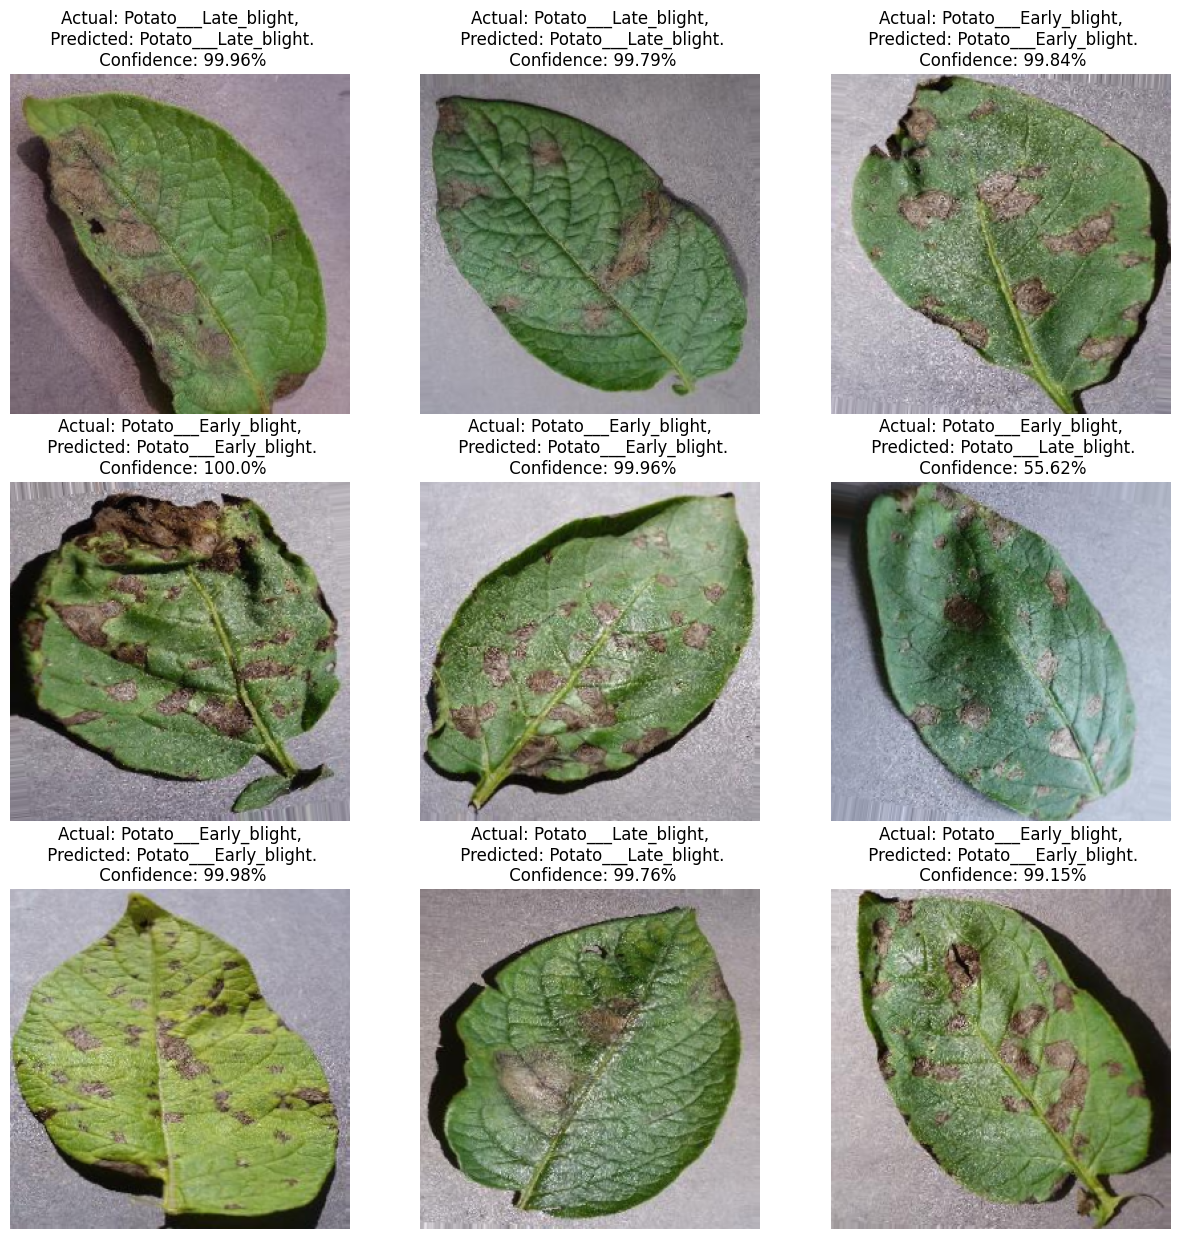

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [32]:
model.save("../potatoes.h5")